In [1]:
import numpy as np
import pandas as pd
#import RandomForest library 
from sklearn.ensemble import RandomForestClassifier
#import traing_test_split 
from sklearn.model_selection import train_test_split
#importing required library for scaling
from sklearn import preprocessing
#import library for metrics
from sklearn import metrics
#import libraries for ROC
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FuneralDepression/passengerSatisfactionCSV/main/satisfaction_2015.csv')
df

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,...,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,...,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,...,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,...,3,3,3,4,5,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,49202,satisfied,Female,Loyal Customer,35,Business travel,Business,2592,5,5,...,4,5,5,5,5,5,5,4,0,0.0
129876,16986,satisfied,Female,Loyal Customer,11,Business travel,Eco,610,5,1,...,5,5,5,4,1,2,5,5,82,65.0
129877,50316,satisfied,Male,Loyal Customer,46,Business travel,Business,86,1,1,...,5,5,1,3,1,5,2,2,0,0.0
129878,22333,satisfied,Female,Loyal Customer,35,Business travel,Business,83,1,1,...,5,5,4,4,2,5,5,5,0,0.0


In [3]:
#create features list
feats = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient','Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness', 'Departure Delay in Minutes','Arrival Delay in Minutes']
#set feature list
X = df[feats]
#print head 
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,3,3,1,5,3,3,4,3,0,0.0
1,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,3,2,1,1,4,4,3,2,0,0.0
2,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,3,3,3,5,3,2,3,3,0,0.0
3,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,4,4,5,4,5,5,5,4,0,0.0
4,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,3,3,3,4,5,3,4,3,0,0.0


In [4]:
#set y as satisfaction
# y is label for output
y = df['satisfaction_v2']
y

0         satisfied
1         satisfied
2         satisfied
3         satisfied
4         satisfied
            ...    
129875    satisfied
129876    satisfied
129877    satisfied
129878    satisfied
129879    satisfied
Name: satisfaction_v2, Length: 129880, dtype: object

In [5]:
#create dummy variables
gender = pd.get_dummies(df.Gender)
CType = pd.get_dummies(df['Customer Type'])
ToT = pd.get_dummies(df['Type of Travel'])
class1 = pd.get_dummies(df.Class)


In [6]:
#merge dummies into original dataframe
merge = pd.concat([df,gender,CType,ToT,class1],axis = 'columns')
merge

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Arrival Delay in Minutes,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,0.0,0,1,0,1,0,1,0,1,0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,...,0.0,0,1,0,1,0,1,0,1,0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,...,0.0,0,1,0,1,0,1,0,1,0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,...,0.0,1,0,0,1,0,1,0,1,0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,...,0.0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,49202,satisfied,Female,Loyal Customer,35,Business travel,Business,2592,5,5,...,0.0,1,0,1,0,1,0,1,0,0
129876,16986,satisfied,Female,Loyal Customer,11,Business travel,Eco,610,5,1,...,65.0,1,0,1,0,1,0,0,1,0
129877,50316,satisfied,Male,Loyal Customer,46,Business travel,Business,86,1,1,...,0.0,0,1,1,0,1,0,1,0,0
129878,22333,satisfied,Female,Loyal Customer,35,Business travel,Business,83,1,1,...,0.0,1,0,1,0,1,0,1,0,0


In [7]:
#drop catagorical features
df_Final = merge.drop(['Gender','Customer Type', 'Type of Travel', 'Class'],axis = 'columns')
df_Final

,id,satisfaction_v2,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Arrival Delay in Minutes,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus
0,117135,satisfied,56,369,0,2,0,4,3,0,...,0.0,0,1,0,1,0,1,0,1,0
1,72091,satisfied,49,2486,0,2,1,4,2,1,...,0.0,0,1,0,1,0,1,0,1,0
2,29663,satisfied,55,1448,0,3,0,4,3,0,...,0.0,0,1,0,1,0,1,0,1,0
3,81849,satisfied,36,1501,0,4,0,3,4,0,...,0.0,1,0,0,1,0,1,0,1,0
4,83693,satisfied,55,577,0,5,0,3,3,5,...,0.0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,49202,satisfied,35,2592,5,5,5,5,4,2,...,0.0,1,0,1,0,1,0,1,0,0
129876,16986,satisfied,11,610,5,1,1,1,5,5,...,65.0,1,0,1,0,1,0,0,1,0
129877,50316,satisfied,46,86,1,1,1,1,5,5,...,0.0,0,1,1,0,1,0,1,0,0
129878,22333,satisfied,35,83,1,1,1,1,5,5,...,0.0,1,0,1,0,1,0,1,0,0


In [8]:
features = ['Age','Flight Distance','Inflight wifi service','Departure/Arrival time convenient',
           'Seat comfort','Inflight entertainment','On-board service','Leg room service',
           'Baggage handling','Checkin service','Arrival Delay in Minutes','Female','Male',
           'Loyal Customer','disloyal Customer','Business travel','Personal Travel',
           'Business','Eco','Eco Plus']
X1 = df_Final[features]
X1.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Arrival Delay in Minutes,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus
0,56,369,0,2,3,3,1,5,3,3,0.0,0,1,0,1,0,1,0,1,0
1,49,2486,0,2,3,2,1,1,4,4,0.0,0,1,0,1,0,1,0,1,0
2,55,1448,0,3,3,3,3,5,3,2,0.0,0,1,0,1,0,1,0,1,0
3,36,1501,0,4,4,4,5,4,5,5,0.0,1,0,0,1,0,1,0,1,0
4,55,577,0,5,3,3,3,4,5,3,0.0,0,1,0,1,0,1,0,1,0


In [9]:
#set NaN values to 0
X1 = X1.fillna(0)

In [10]:
y1 = df_Final['satisfaction_v2']
y1

0         satisfied
1         satisfied
2         satisfied
3         satisfied
4         satisfied
            ...    
129875    satisfied
129876    satisfied
129877    satisfied
129878    satisfied
129879    satisfied
Name: satisfaction_v2, Length: 129880, dtype: object

In [11]:
#train test split
#random_state = 42 is most common besides 0
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.30,random_state=42)

In [12]:
#define Random Forest
#n_estimators = number of trees in forest
#max_features = num of feats to consider when looking for best split, auto,sqrt or log2
#random_state = 42 is common number used
RF = RandomForestClassifier(n_estimators = 49, random_state = 0, max_features = 'sqrt')

In [13]:
#fit data on RandomForest
RF.fit(X1,y1)

RandomForestClassifier(max_features='sqrt', n_estimators=49, random_state=0)

In [14]:
#training the training set
RF.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=49, random_state=0)

In [15]:
#testing on testing set
y_predict = RF.predict(X_test)

In [16]:
#import accuracy library
from sklearn.metrics import accuracy_score

In [17]:
#accuracy for RandomForest
score_RF = accuracy_score(y_test,y_predict)
print(score_RF)

0.9548814290113952


# Accuracy Score for Random Forest with random_state = 0, max_features = 'sqrt', n_estimators = 49 is 95.488%

In [18]:
#Random Forest with max_features = log2
RF1 = RandomForestClassifier(n_estimators = 77, random_state = 9, max_features = 'log2')

In [19]:
#fit data to RF1
RF1.fit(X1,y1)

RandomForestClassifier(max_features='log2', n_estimators=77, random_state=9)

In [20]:
#training the training set
RF1.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=77, random_state=9)

In [21]:
#testing data
y_predict1 = RF1.predict(X_test)

In [22]:
#accuracy for RF1
score_RF1 = accuracy_score(y_test,y_predict1)
print(score_RF1)

0.955189405605174


# Accuracy Score for Random Forest with random_state = 9, max_features = 'log2', n_estimators = 77 is 95.518%

In [23]:
#Random Forest with max_features = log2
#Random Forest random_state = 0
RF2 = RandomForestClassifier(n_estimators = 120, random_state = 6, bootstrap = True, max_features = 'log2')

In [24]:
#fit data to RF2
RF2.fit(X1,y1)

RandomForestClassifier(max_features='log2', n_estimators=120, random_state=6)

In [25]:
#train RF2 with training set
RF2.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=120, random_state=6)

In [26]:
#testing data
y_predict2 = RF2.predict(X_test)

In [27]:
#accuracy for RF2
score_RF2 = accuracy_score(y_test,y_predict2)
print(score_RF2)

0.9555230469151011


# Accuracy Score for Random Forest with random_state = 6, max_features = 'log2', n_estimators = 120 is 95.552%

In [28]:
#Random Forest with max_features = sqrt
#Random Forest random_state = 42
RF3 = RandomForestClassifier(n_estimators = 100, random_state = 42, max_features = 'sqrt')


In [29]:
#fit data to RF3
RF3.fit(X1,y1)

RandomForestClassifier(max_features='sqrt', random_state=42)

In [30]:
#training the training set
RF3.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', random_state=42)

In [31]:
#testing data
y_predict3 = RF3.predict(X_test)

In [32]:
#accuracy for RF3
score_RF3 = accuracy_score(y_test,y_predict3)
print(score_RF3)

0.9554973821989529


# Accuracy Score for Random Forest with random_state = 42, max_features = 'sqrt', n_estimators = 100 is 95.549%

In [33]:
#scaling features
scale_x = preprocessing.scale(X1)

#Random Forest with max_features = sqrt
#Random Forest random_state = 42
RF4 = RandomForestClassifier(n_estimators = 100, random_state = 42, bootstrap = True, max_features = 'sqrt')

#train_test_split the model
X_train, X_test, y_train, y_test = train_test_split(scale_x,y1,test_size=0.30,random_state=42)

#fitting data to RF4 object
RF4.fit(scale_x,y1)

#training the data to RF4
RF4.fit(X_train, y_train)

#testing the data
y_predict4 = RF4.predict(X_test)

#accuracy for RF4
score_RF4 = accuracy_score(y_test, y_predict4)
print("accuracy with scaled data is ")
print(score_RF4 * 100)

accuracy with scaled data is 
95.56257057796941


In [34]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_4 = RF4.predict_proba(X_test)
print(y_predict_prob_4)

[[0.41 0.59]
 [0.98 0.02]
 [0.01 0.99]
 ...
 [0.18 0.82]
 [0.92 0.08]
 [0.49 0.51]]


In [35]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict4)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_4)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_4[:,1])

103044                  satisfied
43282     neutral or dissatisfied
65543                   satisfied
65083                   satisfied
76496     neutral or dissatisfied
                   ...           
32347     neutral or dissatisfied
123061                  satisfied
74700                   satisfied
54997     neutral or dissatisfied
107396                  satisfied
Name: satisfaction_v2, Length: 38964, dtype: object
['satisfied' 'neutral or dissatisfied' 'satisfied' ... 'satisfied'
 'neutral or dissatisfied' 'satisfied']
[[0.41 0.59]
 [0.98 0.02]
 [0.01 0.99]
 ...
 [0.18 0.82]
 [0.92 0.08]
 [0.49 0.51]]
[0.59 0.02 0.99 ... 0.82 0.08 0.51]


In [36]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_4[:,1], pos_label='satisfied')

print(fpr)
print(tpr)

[0.00000000e+00 1.82124482e-04 2.73186723e-04 4.09780085e-04
 4.09780085e-04 4.55311205e-04 5.91904567e-04 7.28497928e-04
 7.74029049e-04 9.56153531e-04 1.09274689e-03 1.27487137e-03
 1.50252698e-03 1.63912034e-03 1.82124482e-03 2.04890042e-03
 2.18549379e-03 2.50421163e-03 3.14164732e-03 3.59695852e-03
 4.00673861e-03 4.37098757e-03 4.73523653e-03 4.96289214e-03
 5.28160998e-03 5.82798343e-03 6.23776351e-03 6.73860584e-03
 7.28497928e-03 7.92241497e-03 8.65091290e-03 9.42494195e-03
 1.00623776e-02 1.06998133e-02 1.16559669e-02 1.23844648e-02
 1.30219005e-02 1.39780540e-02 1.44788963e-02 1.53895187e-02
 1.61180167e-02 1.70286391e-02 1.80758548e-02 1.93051951e-02
 2.03068798e-02 2.13540955e-02 2.23102491e-02 2.33119337e-02
 2.46778673e-02 2.56340209e-02 2.67722989e-02 2.78650458e-02
 2.93675727e-02 3.05058507e-02 3.17351910e-02 3.37840914e-02
 3.54687429e-02 3.71533943e-02 3.84282657e-02 4.03861039e-02
 4.22984110e-02 4.45749670e-02 4.64872741e-02 4.86727678e-02
 5.14046351e-02 5.345353

In [37]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.9912787550310638


# AUC is 99.12%

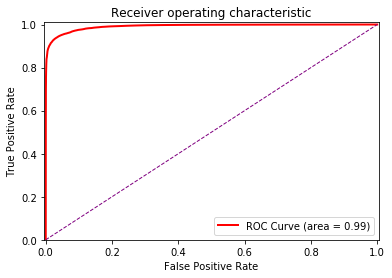

In [38]:
#keep figures inside jupyter notebook
%matplotlib inline

plt.figure()

#ROC curve
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC Curve (area = %0.2f)' % AUC)

#Random Guess Line:
plt.plot([0, 1], [0, 1], color = 'purple', lw = 1, linestyle = '--')

#Defining The Range of X-Axis and Y-Axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")

plt.show()